# Aprendizado supervisionado

## Modelos de classificação

#### 1. Import das bibliotecas

In [1]:
import pandas as pd 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

c:\Users\alice\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
c:\Users\alice\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


#### 2. Carrega dataset

In [4]:
from sklearn.datasets import load_iris 
iris = load_iris() 

# Criar DataFrame com colunas renomeadas
df = pd.DataFrame(
    iris.data,
    columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
)

# Adicionar a coluna da classe (nome da espécie)
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Mostrar as primeiras linhas
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


#### 3. Separação X e y 

Separar em X e y organiza os dados de forma lógica: X contém o que o modelo usa para prever, e y contém o que queremos prever. Sem essa separação, o aprendizado e a avaliação não funcionariam corretamente.

In [5]:
#Separando as features (X) e (y)
x = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']] 
y = df['species']

In [6]:
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [7]:
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: category
Categories (3, object): ['setosa', 'versicolor', 'virginica']

**!!! ATENÇÃO**: 

O modelo aplicado ao dataset Iris frequentemente apresenta métricas perfeitas porque o conjunto de dados possui características que facilitam a classificação. As classes, especialmente a Iris setosa, são naturalmente separáveis com base nos quatro atributos (comprimento e largura da sépala e da pétala), e as outras duas espécies também apresentam separabilidade relativamente clara. Além disso, o dataset é pequeno, limpo e equilibrado, sem valores faltantes ou ruídos, e o problema em si é relativamente simples, permitindo que algoritmos comuns, como KNN ou árvores de decisão, aprendam as fronteiras entre classes de forma eficaz. Por isso, modelos treinados sobre Iris geralmente conseguem prever todas as amostras corretamente, resultando em métricas próximas de 1.

#### 4. Separação entre treino e teste
Separar os dados em treino (train) e teste (test) é outra prática fundamental em aprendizado de máquina, e complementa a separação em X e y. O objetivo é avaliar o desempenho real do modelo em dados que ele nunca viu antes, evitando ilusões de acerto.

Separar treino e teste garante que a avaliação do modelo seja honesta e confiável, mostrando se ele realmente aprendeu padrões úteis e não apenas memorizou os dados de treino.


In [10]:
#Dividindo o conjunto de dados em 70% para treinamento e 30% para teste 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=23)

In [15]:
x_train.head()

,sepal_length,sepal_width,petal_length,petal_width
146,6.3,2.5,5.0,1.9
106,4.9,2.5,4.5,1.7
131,7.9,3.8,6.4,2.0
34,4.9,3.1,1.5,0.2
99,5.7,2.8,4.1,1.3


In [14]:
y_train.head()

146     virginica
106     virginica
131     virginica
34         setosa
99     versicolor
Name: species, dtype: category
Categories (3, object): ['setosa', 'versicolor', 'virginica']

#### 5. Modelos


##### 5.1 Regressão logística
Transforma a combinação linear das variáveis em uma probabilidade, permitindo classificar exemplos em duas classes. É um dos modelos mais básicos e interpretáveis de classificação em aprendizado de máquina.

A regressão logística calcula uma combinação linear das variáveis de entrada (features), igual à regressão linear:

z = b0 + b1*x1 + b2*x2 + ... + bn*xn

Depois, aplica a função logística (sigmoide) para transformar z em uma probabilidade entre 0 e 1:

P(y=1) = 1 / (1 + e^(-z))

O resultado P(y=1) representa a probabilidade do exemplo pertencer à classe positiva.
Para obter a classe final, normalmente usa-se um limiar de 0.5:

P ≥ 0.5 → classe 1
P < 0.5 → classe 0


In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
#Criando e treinando o modelo de regressão logística
modelo = LogisticRegression()
modelo.fit(x_train, y_train)

LogisticRegression()

In [20]:
#Fazendo previsões sobre o conjunto de dados de teste 
y_pred = modelo.predict(x_test)
y_pred[:5]

array(['virginica', 'virginica', 'versicolor', 'setosa', 'virginica'],
      dtype=object)

In [21]:
y_test[:5] #y_pred acertou os 5 primeiros, mas a seguir vamos analisar melhor o desempenho

139     virginica
125     virginica
67     versicolor
3          setosa
113     virginica
Name: species, dtype: category
Categories (3, object): ['setosa', 'versicolor', 'virginica']

In [23]:
#Métricas de avaliação

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
f1 = f1_score(y_test, y_pred, average='micro')

print('Acuracia:', accuracy)
print('Precisão:', precision)
print('Recall:', recall)
print('F1-Score:', f1)

Acuracia: 1.0
Precisão: 1.0
Recall: 1.0
F1-Score: 1.0


##### 5.2 KNN (K-Nearest Neighbors)

É um algoritmo de aprendizado de máquina baseado em instâncias, usado principalmente para classificação e, em alguns casos, para regressão. Ele é simples, intuitivo e não faz suposições complexas sobre a distribuição dos dados, o que o torna bastante flexível.

1. Armazena os dados de treino: diferente de outros modelos, o KNN não cria uma função ou coeficientes. Ele simplesmente memoriza o conjunto de treinamento.
2. Calcula a distância: Para classificar um novo ponto, o KNN calcula a distância entre esse ponto e todos os exemplos do conjunto de treino, sendo que as distâncias mais comuns são: Euclidiana (padrão), Manhattan (L1) e Minkowski
3. Encontra os K vizinhos mais próximos: O valor de K é escolhido pelo usuário. 
4. Os K exemplos mais próximos do ponto novo determinam a classificação.
5. Decide a classe: para classificação a classe do novo ponto é definida por votação majoritária entre os K vizinhos. Já para regressão o valor é a média dos valores dos vizinhos.

Pontos fortes:
- Simplicidade e interpretabilidade: fácil de entender e implementar.
- Não paramétrico: não assume nenhuma forma específica para os dados.
- Flexível: funciona para problemas lineares e não lineares.

Limitações:
- Computacionalmente caro: precisa calcular distâncias para todos os pontos de treino, especialmente em datasets grandes.
- Sensível à escala das features: é importante normalizar ou padronizar os dados antes.
- Sensível a ruídos e outliers: um vizinho “errado” pode afetar a classificação.
- Escolha do K: valores pequenos podem causar sobreajuste (overfitting), enquanto valores grandes podem suavizar demais as fronteiras (underfitting).

In [24]:
from sklearn.neighbors import KNeighborsClassifier

In [26]:
#Criando e treinando o modelo KNN - o padrão são 5 vizinhos
modelo = KNeighborsClassifier(n_neighbors=3)
modelo.fit(x_train, y_train)

#Fazendo previsões sobre o conjunto de dados de teste 
y_pred = modelo.predict(x_test)

In [27]:
#Métricas de avaliação
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
f1 = f1_score(y_test, y_pred, average='micro')

print('Acuracia:', accuracy)
print('Precisão:', precision)
print('Recall:', recall)
print('F1-Score:', f1)

Acuracia: 0.9777777777777777
Precisão: 0.9777777777777777
Recall: 0.9777777777777777
F1-Score: 0.9777777777777777


In [29]:
y_test.head()

139     virginica
125     virginica
67     versicolor
3          setosa
113     virginica
Name: species, dtype: category
Categories (3, object): ['setosa', 'versicolor', 'virginica']

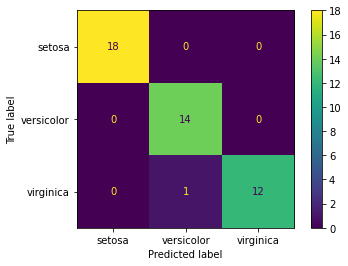

In [31]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred, labels = ['setosa', 'versicolor', 'virginica'])
disp = ConfusionMatrixDisplay(confusion_matrix= cm, display_labels= ['setosa', 'versicolor', 'virginica'])
disp.plot()
plt.show()

In [34]:
#Relação acurácia com a quantidade de vizinhos 
number_neighbors = range(1, 106) #105 é o tamanho da base de teste
accuracy_dict = dict() 

for i in number_neighbors:
    knn_model = KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(x_train, y_train)
    y_pred = knn_model.predict(x_test)
    accuracy_dict[i] = accuracy_score(y_test, y_pred)

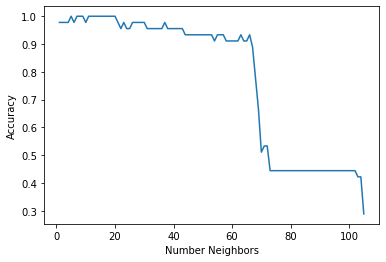

In [37]:
plt.plot(number_neighbors, accuracy_dict.values())
plt.xlabel("Number Neighbors")
plt.ylabel("Accuracy")
plt.show()

##### 5.3 Árvore de decisão

É um algoritmo de aprendizado de máquina que organiza as decisões de forma hierárquica, parecendo uma árvore invertida. É intuitiva, interpretável e bastante usada em problemas de classificação de dados.

A árvore divide o conjunto de dados em subconjuntos com base em critérios de decisão sobre os atributos (features). Cada divisão tenta separar melhor as classes (ou valores no caso de regressão).

**Critérios de separação:**

Para classificação, medidas comuns incluem:
* Gini Impurity – mede a impureza das classes em um nó.
* Entropy / Information Gain – mede a quantidade de informação que cada divisão adiciona.

Para prever a classe de um novo exemplo, percorremos a árvore do nó raiz até uma folha, seguindo as decisões que se aplicam aos atributos do exemplo.

**Pontos fortes:**
- Interpretável: você consegue visualizar claramente como a decisão foi tomada.
- Não precisa de normalização: funciona bem com dados em escalas diferentes.
- Captura relações não lineares: pode lidar com padrões complexos sem transformação dos dados.

**Limitações:**
- Overfitting: árvores muito profundas tendem a memorizar os dados de treino.
- Instáveis: pequenas mudanças nos dados podem gerar árvores muito diferentes.
- Não tão eficiente para grandes datasets: pode crescer rapidamente em tamanho sem poda.

In [38]:
from sklearn.tree import DecisionTreeClassifier 

In [42]:
#Criando e treinando o modelo de árvore de decisão
modelo = DecisionTreeClassifier()
modelo.fit(x_train, y_train)

#Fazendo previsões sobre o conjunto de dados de teste 
y_pred = modelo.predict(x_test)

In [43]:
#Métricas de avaliação
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
f1 = f1_score(y_test, y_pred, average='micro')

print('Acuracia:', accuracy)
print('Precisão:', precision)
print('Recall:', recall)
print('F1-Score:', f1)

Acuracia: 0.9777777777777777
Precisão: 0.9777777777777777
Recall: 0.9777777777777777
F1-Score: 0.9777777777777777


[Text(0.5416666666666666, 0.9285714285714286, 'petal_width <= 0.8\n105\n[32, 36, 37]\nversicolor'),
 Text(0.4583333333333333, 0.7857142857142857, '32\n[32, 0, 0]\nsetosa'),
 Text(0.625, 0.7857142857142857, 'petal_width <= 1.75\n73\n[0, 36, 37]\nversicolor'),
 Text(0.4166666666666667, 0.6428571428571429, 'petal_lenght <= 5.35\n39\n[0, 35, 4]\nvirgínica'),
 Text(0.3333333333333333, 0.5, 'petal_width <= 1.65\n37\n[0, 35, 2]\nvirgínica'),
 Text(0.16666666666666666, 0.35714285714285715, 'petal_lenght <= 4.95\n35\n[0, 34, 1]\nvirgínica'),
 Text(0.08333333333333333, 0.21428571428571427, '33\n[0, 33, 0]\nvirgínica'),
 Text(0.25, 0.21428571428571427, 'sepal_width <= 2.45\n2\n[0, 1, 1]\nvirgínica'),
 Text(0.16666666666666666, 0.07142857142857142, '1\n[0, 0, 1]\nversicolor'),
 Text(0.3333333333333333, 0.07142857142857142, '1\n[0, 1, 0]\nvirgínica'),
 Text(0.5, 0.35714285714285715, 'petal_lenght <= 4.75\n2\n[0, 1, 1]\nvirgínica'),
 Text(0.4166666666666667, 0.21428571428571427, '1\n[0, 0, 1]\nversi

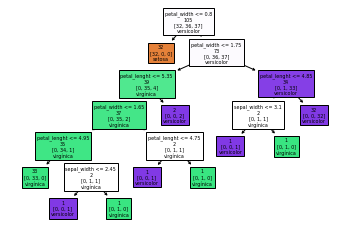

In [44]:
from sklearn import tree 

tree.plot_tree(modelo, feature_names=['sepal_lenght', 'sepal_width', 'petal_lenght', 'petal_width'],
                class_names = ['setosa', 'virgínica', 'versicolor'],
                impurity=False,
                label='none',
                filled=True
)

##### 5.4 SVM (Support Vector Machine)

Poderoso para separar classes com fronteiras claras, mesmo em problemas de alta dimensão, e é conhecido por trabalhar bem com datasets complexos e não lineares.

* O SVM tenta encontrar a melhor linha (ou hiperplano em várias dimensões) que separa as classes no espaço das features - “Melhor” significa a maior margem possível entre as classes, ou seja, o espaço entre a linha de separação e os exemplos mais próximos de cada classe é maximizado.

* Os pontos de dados mais próximos da fronteira são chamados de **vetores de suporte**. Esses pontos são críticos, porque determinam a posição e orientação do hiperplano.

* Kernel trick (núcleo): Quando as classes não são linearmente separáveis, o SVM pode usar funções chamadas **kernels** para transformar os dados em um espaço de dimensão maior, onde eles se tornam separáveis linearmente. Kernels comuns são: Linear, Polinomial e RBF (Radial Basis Function / Gaussiano).


**Pontos fortes:**
- Eficiente em espaços de alta dimensão
- Funciona bem com problemas complexos e com poucas amostras
- Foca apenas nos vetores de suporte, ignorando pontos distantes da fronteira

**Limitações:**
- Sensível à escolha do kernel e dos parâmetros (C, gamma)
- Não escala bem para datasets muito grandes

In [45]:
from sklearn.svm import SVC

In [46]:
#Criando e treinando o modelo SVM
modelo = SVC()
modelo.fit(x_train, y_train)

#Fazendo previsões sobre o conjunto de dados de teste 
y_pred = modelo.predict(x_test)

In [47]:
#Métricas de avaliação
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
f1 = f1_score(y_test, y_pred, average='micro')

print('Acuracia:', accuracy)
print('Precisão:', precision)
print('Recall:', recall)
print('F1-Score:', f1)

Acuracia: 1.0
Precisão: 1.0
Recall: 1.0
F1-Score: 1.0


##### 5.5 Redes Neurais Artificiais (RNA)

São um modelo de aprendizado de máquina inspirado no funcionamento do cérebro humano, capazes de aprender padrões complexos em dados e resolver problemas de classificação, regressão e séries temporais. Elas são especialmente poderosas em tarefas onde os dados têm relações não lineares complexas, como reconhecimento de imagens, fala e texto.

**Estrutura básica:**

Uma RNA é composta por camadas de neurônios artificiais: 
1. Camada de entrada (input layer): Recebe os dados de entrada (features). 
2. Camadas ocultas (hidden layers): Cada neurônio calcula uma combinação ponderada das entradas e aplica uma função de ativação, introduzindo não linearidade ao modelo. Quanto mais camadas e neurônios, maior a capacidade de aprender padrões complexos.
3. Camada de saída (output layer): Produz a previsão final, que pode ser uma classe (classificação) ou um valor contínuo (regressão).


Cada neurônio calcula:

*output = função_de_ativação(soma(pesos * entradas + bias))*

Funções de ativação comuns:
- Sigmoid: transforma valores em [0, 1]
- ReLU (Rectified Linear Unit): foca em valores positivos
- Tanh: transforma valores em [-1, 1]

Treinamento (backpropagation):
- A rede compara a saída prevista com a saída real usando uma função de perda.
- Calcula o erro e ajusta os pesos de todos os neurônios usando gradiente descendente, repetindo o processo até o erro ser minimizado.

**Pontos fortes:**
- Capacidade de modelar relações complexas e não lineares.
- Flexibilidade: pode ser aplicada a diferentes tipos de dados (numéricos, imagens, texto, áudio).
- Base das redes profundas (Deep Learning), quando há muitas camadas ocultas.

**Limitações:**
- Requer grandes volumes de dados para treinar adequadamente.
- Difícil de interpretar: não é tão transparente quanto árvores de decisão ou regressão linear.
- Custo computacional elevado, especialmente redes profundas.

##### 5.5.1 Perceptron
O Perceptron é a forma mais simples de uma rede neural artificial e pode ser considerado a base histórica das RNAs. Foi desenvolvido por Frank Rosenblatt na década de 1950 e é usado principalmente para problemas de classificação binária.

É um neurônio artificial simples que aprende a classificar dados em duas classes ajustando pesos para suas entradas e usando uma função de ativação do tipo degrau. Ele é a pedra fundamental das redes neurais, embora tenha limitações em problemas não lineares.

* saída binária

In [51]:
from sklearn.linear_model import Perceptron

In [56]:
#Como é binário, vamos filtar o dataset:
x = df[["sepal_length", "sepal_width"]]
y = df["species"]

In [60]:
#Dividindo o conjunto de dados em 70% para treinamento e 30% para teste 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=23)

In [61]:
#Criando e treinando o modelo RNA Perceptron
modelo = Perceptron()
modelo.fit(x_train, y_train)

#Fazendo previsões sobre o conjunto de dados de teste 
y_pred = modelo.predict(x_test)

In [62]:
#Métricas de avaliação
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
f1 = f1_score(y_test, y_pred, average='micro')

print('Acuracia:', accuracy)
print('Precisão:', precision)
print('Recall:', recall)
print('F1-Score:', f1)

Acuracia: 0.6888888888888889
Precisão: 0.6888888888888889
Recall: 0.6888888888888889
F1-Score: 0.6888888888888889


##### 5.5.2 Multilayer Perceptron
O Multilayer Perceptron (MLP) é uma evolução do perceptron simples, formando a base das redes neurais artificiais modernas. Ao contrário do perceptron único, o MLP possui uma ou mais camadas ocultas, permitindo resolver problemas não lineares e muito mais complexos - ele generaliza o perceptron simples, tornando-se a base para a maioria das redes neurais modernas.


In [63]:
from sklearn.neural_network import MLPClassifier

In [64]:
#Criando e treinando o modelo RNA Perceptron
modelo = MLPClassifier()
modelo.fit(x_train, y_train)

#Fazendo previsões sobre o conjunto de dados de teste 
y_pred = modelo.predict(x_test)

c:\Users\alice\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [65]:
#Métricas de avaliação
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
f1 = f1_score(y_test, y_pred, average='micro')

print('Acuracia:', accuracy)
print('Precisão:', precision)
print('Recall:', recall)
print('F1-Score:', f1)

Acuracia: 0.7555555555555555
Precisão: 0.7555555555555555
Recall: 0.7555555555555555
F1-Score: 0.7555555555555555
